In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
data = pd.read_csv("../Documents/898ce544-0-MLChallenge_1Datac63af4e/train_indessa.csv")

In [5]:
data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [6]:
data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [42]:
for i in data.columns:
    if data[i].dtype == np.float64 or data[i].dtype == np.int64:
        print(i)

member_id
loan_amnt
funded_amnt
funded_amnt_inv
int_rate
annual_inc
dti
delinq_2yrs
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
collections_12_mths_ex_med
mths_since_last_major_derog
acc_now_delinq
tot_coll_amt
tot_cur_bal
total_rev_hi_lim
loan_status


In [8]:
import matplotlib.pyplot as  plt

%matplotlib inline

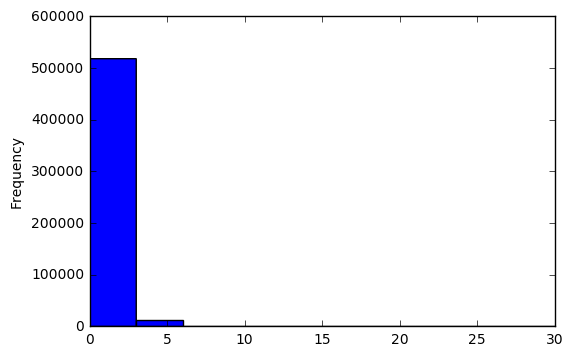

In [19]:
new_data = pd.DataFrame({'delinq_2yrs' : []})
new_data.delinq_2yrs  = data['delinq_2yrs'].dropna()
(new_data['delinq_2yrs'].astype(int)).plot.hist()

In [20]:
my_tab = pd.crosstab(index=new_data["delinq_2yrs"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab

col_0,count
delinq_2yrs,
0.0,430104
1.0,67947
2.0,20167
3.0,7269
4.0,3159
5.0,1622
6.0,898
7.0,451
8.0,266


In [18]:
new_data['loan_status'].dtype

dtype('float64')

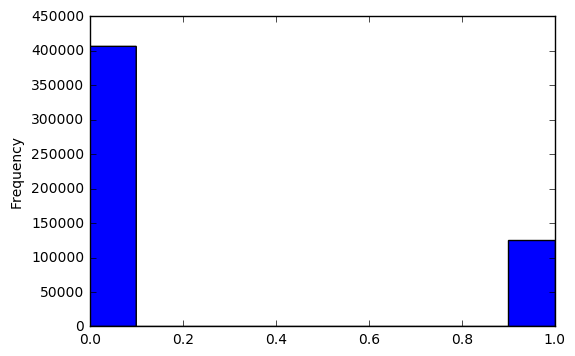

In [25]:
new_data = pd.DataFrame({'loan_status' : []})
new_data.loan_status  = data['loan_status'].dropna()
(new_data['loan_status'].astype(int)).plot.hist()

In [29]:
my_tab = pd.crosstab(index=new_data["loan_status"],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab

col_0,count
loan_status,
0,406601
1,125827


In [32]:
my_tab.columns

Index(['count'], dtype='object', name='col_0')

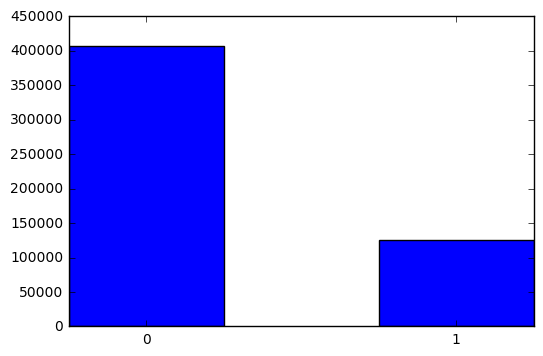

In [41]:
alphab = ['0','1']
frequencies = my_tab['count']

pos = np.arange(len(alphab))
width = 0.5     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, frequencies, width, color='b')
plt.show()

In [68]:
#df = df[np.isfinite(df['EPS'])]
data = data[np.isfinite(data[['loan_amnt','int_rate','annual_inc','loan_status']])]

In [69]:
test_target = data['loan_status']
test_target

0         0
1         0
2         0
3         0
4         0
5         0
6         1
7         0
8         0
9         0
10        0
11        1
12        0
13        0
14        1
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        1
24        0
25        0
26        1
27        1
28        0
29        0
         ..
532398    0
532399    1
532400    0
532401    0
532402    0
532403    0
532404    0
532405    1
532406    0
532407    0
532408    0
532409    0
532410    1
532411    1
532412    0
532413    0
532414    0
532415    1
532416    0
532417    0
532418    0
532419    0
532420    1
532421    0
532422    1
532423    0
532424    0
532425    1
532426    0
532427    0
Name: loan_status, dtype: int64

In [70]:
test_data = data[['loan_amnt','int_rate','annual_inc']]
np.any(np.isnan(test_target))


False

In [71]:
np.all(np.isfinite(test_target))


True

In [72]:
from sklearn import tree

In [73]:
clf = tree.DecisionTreeClassifier()
clf.fit(test_data,test_target)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').